# ARMA模型：
$$
X_{t}=\varphi_{1}X_{t-1}+\ldots+\varphi_{p}X_{t-p}+\theta_{1}\varepsilon_{t-1}
       +\ldots+\theta_{q}\varepsilon_{t-q}+\varepsilon_{t}
$$



# AR模拟

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm

np.random.seed(19260817) # 设立随机种子，让每次运行的结果一致

arparams = np.array([0.9]) # phi1=0.9
maparams = np.array([]) # 
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
print(ar, ma)
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)

[ 1.  -0.9] [1.]


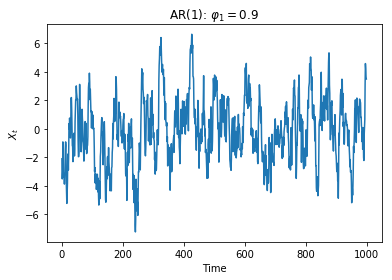

In [19]:
plt.figure()
plt.plot(simulated_data)
plt.xlabel('Time')
plt.ylabel(r'$X_t$')
plt.title(r'AR(1): $\varphi_1=0.9$')
plt.show()

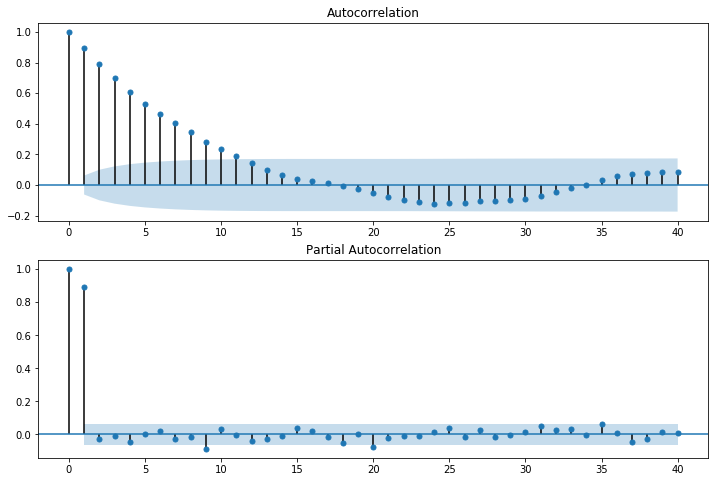

In [20]:
# 绘制ACF及PACF图

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(simulated_data, lags=40, ax=ax2)
plt.show()

# MA模拟

In [21]:
arparams = np.array([]) 
maparams = np.array([0.9]) # theta_1=0.9
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
print(ar, ma)
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)

[1.] [1.  0.9]


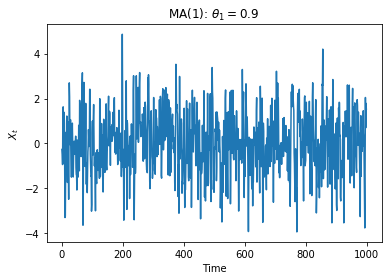

In [23]:
plt.figure()
plt.plot(simulated_data)
plt.xlabel('Time')
plt.ylabel(r'$X_t$')
plt.title(r'MA(1): $\theta_1=0.9$')
plt.show()

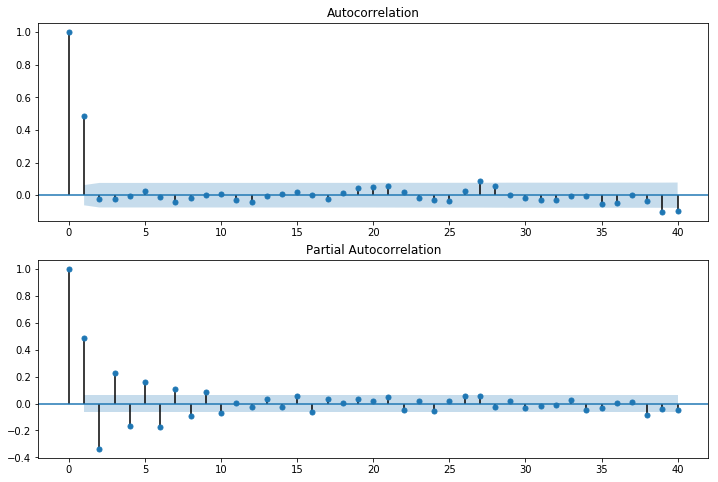

In [24]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(simulated_data, lags=40, ax=ax2)
plt.show()

# ARMA模拟

In [25]:
arparams = np.array([0.9]) 
maparams = np.array([0.9]) # theta_1=0.9
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
print(ar, ma)
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)

[ 1.  -0.9] [1.  0.9]


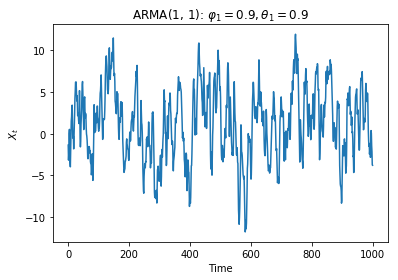

In [16]:
plt.figure()
plt.plot(simulated_data)
plt.xlabel('Time')
plt.ylabel(r'$X_t$')
plt.title(r'ARMA(1, 1): $\varphi_1=0.9, \theta_1=0.9$')
plt.show()

D:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


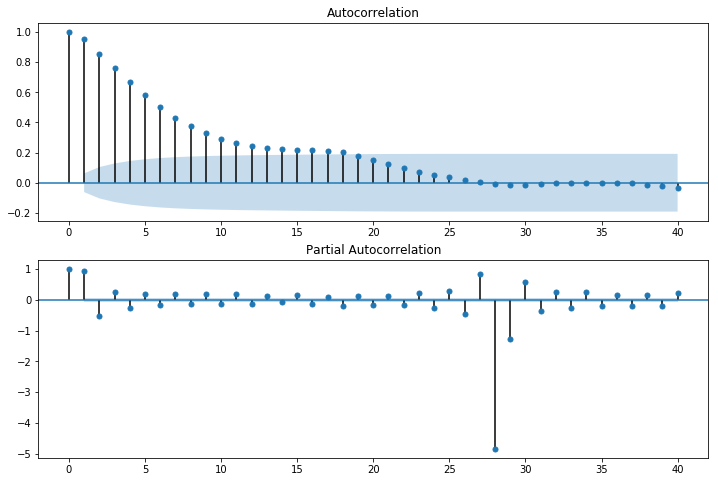

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(simulated_data, lags=40, ax=ax2)
plt.show()

# 差分

In [30]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
# 远程读取洗发水销售数据,3年期间洗发水的每月销售量。
df = pd.read_csv(url)

df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


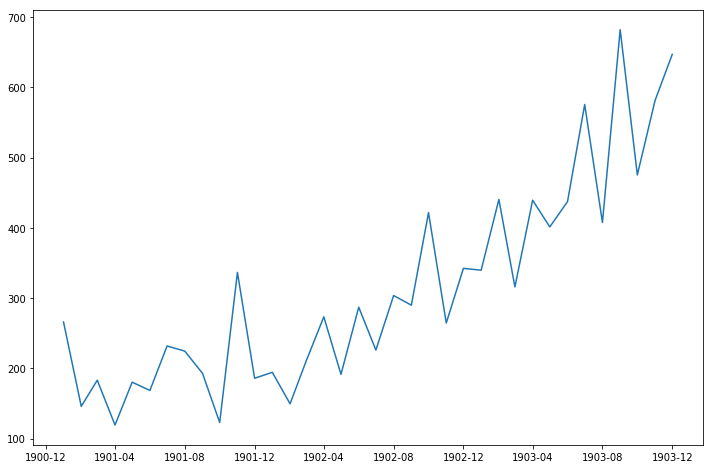

In [40]:
df['date'] = [pd.datetime.strptime('190'+i, '%Y-%m') for i in df['Month']] # 创建日期
plt.figure(figsize=[12, 8])
plt.plot(df['date'], df['Sales'])
plt.show()

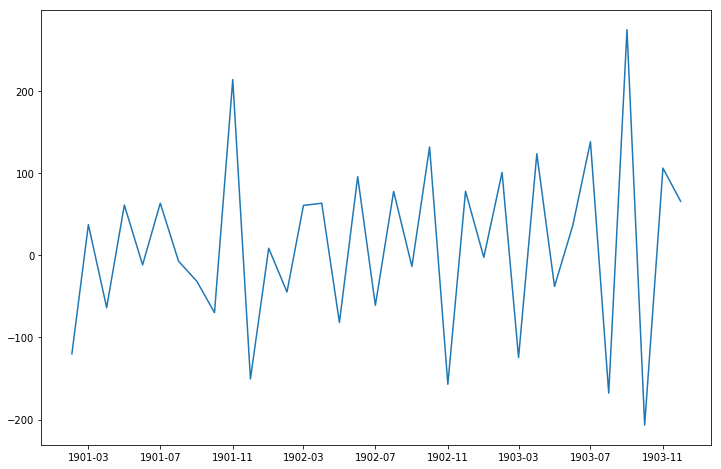

In [45]:
# 一阶差分
plt.figure(figsize=[12, 8])
plt.plot(df['date'], df['Sales'].diff())
plt.show()

D:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


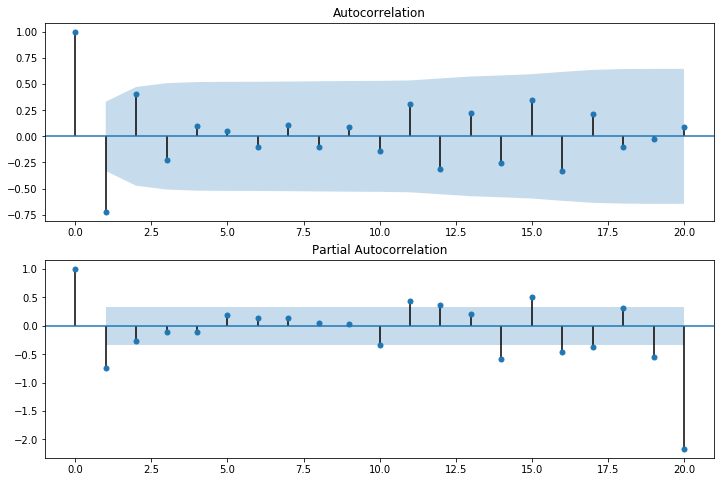

In [50]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(np.diff(df['Sales'].values), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(np.diff(df['Sales'].values), lags=20, ax=ax2)
plt.show()